In [1]:
print("Hello World!")

Hello World!


In [2]:
from tinygrad.core import Tensor
from tinygrad.nn import SimpleMLP
from tinygrad.losses import MSELoss
from tinygrad.optimizers import SimpleSGD, Adam

import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:
path = "IrisFlower/iris.data"

dataset = []
with open(path) as fp:
    file = fp.read().splitlines()
file = [line.split(",") for line in file]
file = file[:150]

dataset = [[list(map(float, line[:4])), line[4]] for line in file]

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
dataset = [[row[0], classes.index(row[1])] for row in dataset]

In [4]:
train_ids = [random.sample(range(i,i+50), k=40) for i in [0, 50, 100]]
train_ids = [item for sublist in train_ids for item in sublist]

val_ids = [i for i in range(150) if i not in train_ids]

trainset = [dataset[i] for i in train_ids]
valset = [dataset[i] for i in val_ids]

In [5]:
print("Trainset size: ", len(trainset))
print("Valset size: ", len(valset))

Trainset size:  120
Valset size:  30


In [6]:
# now we define the model 
# we are going to define a 4, 8, 8, 1 model 
model = SimpleMLP(4, 1, [8, 8])

# temporary fix to make last layer nonlin=False
for i, layer in enumerate(model.layers):
    if i == len(model.layers) - 1:
        for n in layer.neurons:
            n.nonlin = False

# print the model summary
model.summary()

#total parameters
print("Number of parameters:", len(model.parameters()))

SimpleMLP(
Linear(ins:4 outs:8 num_parameters:40)
Linear(ins:8 outs:8 num_parameters:72)
Linear(ins:8 outs:1 num_parameters:9)
)
Number of parameters: 121


In [7]:
epochs = 500
lr = 0.001

optimizer = Adam(model.parameters(), lr=lr)
loss_fn = MSELoss

X = [list(map(Tensor, x[0])) for x in trainset]
Y = [Tensor(x[1]) for x in trainset]

losslist = [] #to store losses

for i in range(epochs):
    
    for xi, yi in zip(X, Y):
        
        # we pass a single data-point once i.e. the single-batch approach.
        # As expected, convergence is much faster and better
        preds = model(xi) 

        loss = loss_fn(preds, yi)
    
        model.zero_grad()
        loss.backward()
    
        optimizer.step()
    
    if i%5 == 0:
        print("For epoch: {}, loss: {}".format(i, loss.data))
        losslist.append(loss.data)

For epoch: 0, loss: 0.1380820547557895
For epoch: 5, loss: 0.17723789989906655
For epoch: 10, loss: 0.18795161944143365
For epoch: 15, loss: 0.18789678893992356
For epoch: 20, loss: 0.18497993290296091
For epoch: 25, loss: 0.18227045496367802
For epoch: 30, loss: 0.1778377744288609
For epoch: 35, loss: 0.17243988354734371
For epoch: 40, loss: 0.16796825729297604
For epoch: 45, loss: 0.16357567396140493
For epoch: 50, loss: 0.15851889111339237
For epoch: 55, loss: 0.15432244925866798
For epoch: 60, loss: 0.1501863202607278
For epoch: 65, loss: 0.14515222222186436
For epoch: 70, loss: 0.13984042917858006
For epoch: 75, loss: 0.13307858671717906
For epoch: 80, loss: 0.12372031055084633
For epoch: 85, loss: 0.11770810691123336
For epoch: 90, loss: 0.11222300999323132
For epoch: 95, loss: 0.10728956054779047
For epoch: 100, loss: 0.09710522013169669
For epoch: 105, loss: 0.0918452772178255
For epoch: 110, loss: 0.08630805178202909
For epoch: 115, loss: 0.08389386256954563
For epoch: 120, lo

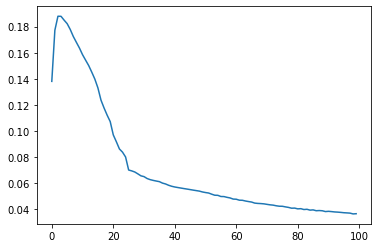

In [17]:
plt.plot(range(len(losslist)), losslist)

In [9]:
X_val = [list(map(Tensor, x[0])) for x in valset]
Y_val = [Tensor(x[1]) for x in valset]

preds = list(map(model, X_val))

In [10]:
val_loss = loss_fn(preds, Y_val)
print("val loss: ", val_loss.data)

val loss:  0.03908728747859953


In [16]:
accuracy = 0
idx = 0
for pi, yi in zip(preds, Y_val):
    if idx % 2 == 0:
        print("idx: {}, predicted: {}, true value: {}".format(idx, round((pi.data)), yi.data))
    if round(pi.data) == yi.data:
        accuracy += 1
    idx += 1
print("Accurate Preds: {}, Total data-points: {}, Validation accuracy: {}".format(accuracy, len(Y_val), (accuracy/len(Y_val)) * 100))

idx: 0, predicted: 0, true value: 0
idx: 2, predicted: 0, true value: 0
idx: 4, predicted: 0, true value: 0
idx: 6, predicted: 0, true value: 0
idx: 8, predicted: 0, true value: 0
idx: 10, predicted: 1, true value: 1
idx: 12, predicted: 1, true value: 1
idx: 14, predicted: 2, true value: 1
idx: 16, predicted: 1, true value: 1
idx: 18, predicted: 1, true value: 1
idx: 20, predicted: 2, true value: 2
idx: 22, predicted: 2, true value: 2
idx: 24, predicted: 2, true value: 2
idx: 26, predicted: 2, true value: 2
idx: 28, predicted: 2, true value: 2
Accurate Preds: 28, Total data-points: 30, Validation accuracy: 93.33333333333333


In [12]:
# now we save the model 
model.save("saved_models/model_adam_93.pkl")

In [18]:
# now we load the saved model and check validation accuracy

val_model = SimpleMLP(4, 1, [8, 8])
val_model.load_pkl("saved_models/model_adam_93.pkl")

preds = list(map(model, X_val))

accuracy = 0
idx = 0
for pi, yi in zip(preds, Y_val):
    if idx % 2 == 0:
        print("idx: {}, predicted: {}, true value: {}".format(idx, round((pi.data)), yi.data))
    if round(pi.data) == yi.data:
        accuracy += 1
    idx += 1
print("Accurate Preds: {}, Total data-points: {}, Validation accuracy: {}".format(accuracy, len(Y_val), (accuracy/len(Y_val)) * 100))


idx: 0, predicted: 0, true value: 0
idx: 2, predicted: 0, true value: 0
idx: 4, predicted: 0, true value: 0
idx: 6, predicted: 0, true value: 0
idx: 8, predicted: 0, true value: 0
idx: 10, predicted: 1, true value: 1
idx: 12, predicted: 1, true value: 1
idx: 14, predicted: 2, true value: 1
idx: 16, predicted: 1, true value: 1
idx: 18, predicted: 1, true value: 1
idx: 20, predicted: 2, true value: 2
idx: 22, predicted: 2, true value: 2
idx: 24, predicted: 2, true value: 2
idx: 26, predicted: 2, true value: 2
idx: 28, predicted: 2, true value: 2
Accurate Preds: 28, Total data-points: 30, Validation accuracy: 93.33333333333333
